### What not to do while weight initializing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('ushape.csv',header=None,names=['x','y','class'])
df.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


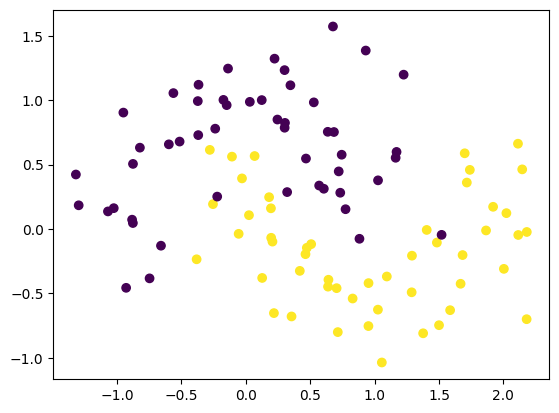

In [6]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [7]:
x = df.drop(['class'],axis=1)
y = df['class']

In [3]:
import tensorflow
from tensorflow import keras

In [5]:
model = keras.Sequential()

model.add(keras.layers.Dense(10, activation='sigmoid',input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

F:\Data Science\Deep Learning\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.get_weights()

[array([[ 0.46962482, -0.21209711, -0.19845247,  0.3938139 , -0.14244151,
          0.44567412,  0.28189313, -0.61836255,  0.45933694,  0.50021094],
        [ 0.2716543 , -0.5530206 ,  0.36419493, -0.31159517, -0.23153085,
          0.42760366, -0.04209208, -0.5933089 , -0.5219375 , -0.41946447]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6694966 ],
        [-0.10815597],
        [ 0.5172271 ],
        [ 0.3705638 ],
        [-0.01014209],
        [-0.1986655 ],
        [-0.13315666],
        [ 0.25480366],
        [ 0.11984581],
        [ 0.10983664]], dtype=float32),
 array([0.], dtype=float32)]

### Zero Weight Initilaization
- Using Sigmoid as an activation function

In [13]:
weights = model.get_weights()

In [16]:
import numpy as np 

weights[0] = np.zeros(weights[0].shape)
weights[1] = np.zeros(weights[1].shape)
weights[2] = np.zeros(weights[2].shape)
weights[3] = np.zeros(weights[3].shape)

In [18]:
model.set_weights(weights)

In [19]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x,y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.4878 - loss: 0.6932
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.6929 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4885 - loss: 0.6929  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5240 - loss: 0.6933 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5177 - loss: 0.6933  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4833 - loss: 0.6940  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5458 - loss: 0.6926  
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5042 - loss: 0.6934  
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5379 - loss: 0.6935  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5292 - loss: 0.6933  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5208 - loss: 0.6931 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.488

In [31]:
model.get_weights()

[array([[ 0.32489422,  0.32489422,  0.32489422,  0.32489422,  0.32489422,
          0.32489422,  0.32489422,  0.32489422,  0.32489422,  0.32489422],
        [-0.36730024, -0.36730024, -0.36730024, -0.36730024, -0.36730024,
         -0.36730024, -0.36730024, -0.36730024, -0.36730027, -0.36730027]],
       dtype=float32),
 array([-0.08514044, -0.08514044, -0.08514044, -0.08514044, -0.08514044,
        -0.08514044, -0.08514044, -0.08514044, -0.08514045, -0.08514045],
       dtype=float32),
 array([[0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484],
        [0.02059484]], dtype=float32),
 array([-0.02704309], dtype=float32)]

#### Decison boundary while intializing weights as zero

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

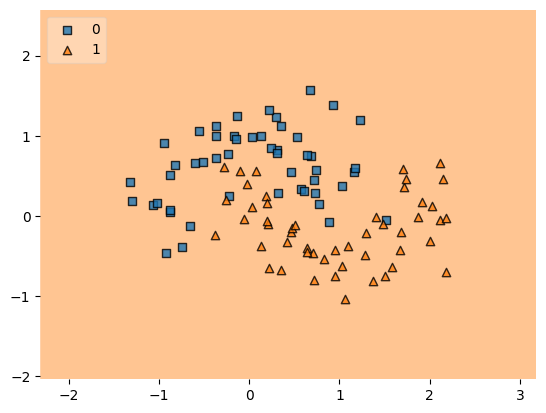

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),np.array(y.astype(int)), clf=model, legend=2)

#### Initializing original weights

In [43]:
model1 = keras.Sequential()

model1.add(keras.layers.Dense(10,activation='sigmoid',input_dim=2))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
          
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model1.get_weights()

[array([[ 0.3694089 ,  0.702859  ,  0.24977201,  0.08085555, -0.5258283 ,
          0.60662144,  0.09086037, -0.26634768, -0.00749588,  0.604114  ],
        [-0.43870485,  0.45050508, -0.4694206 ,  0.03500736,  0.20268202,
          0.35520953,  0.22770679,  0.01493311,  0.04349875,  0.59239954]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.02932167],
        [ 0.64565235],
        [-0.46802154],
        [ 0.15293509],
        [ 0.25652522],
        [-0.2007072 ],
        [ 0.5113959 ],
        [-0.3543248 ],
        [ 0.7203484 ],
        [-0.50671244]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

In [48]:
model1.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5115 - loss: 0.7355
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4844 - loss: 0.7348 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5365 - loss: 0.7206 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5281 - loss: 0.7139 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 0.7214 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5073 - loss: 0.7096 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5094 - loss: 0.7128 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4844 - loss: 0.7181 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 0.7123 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5125 - loss: 0.7060 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4979 - loss: 0.7171  
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4948 - l

### Decision boundary while using original weights initialization
- Still results are not much good as we did not used any good technique for weight initialization but still we can visualize the results while comparing it with zero initialization method. 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

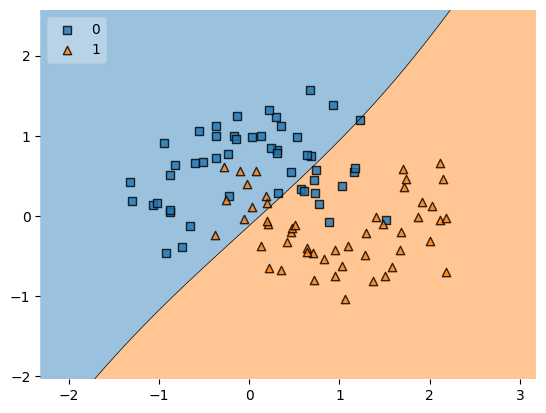

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),np.array(y.astype(int)), clf=model1, legend=2)

### Trying zero weight initialization using relu as activation function

In [52]:
model2 = keras.Sequential()

model2.add(keras.layers.Dense(10,activation='relu',input_dim=2))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

model2.summary()

F:\Data Science\Deep Learning\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
relu_weights = model2.get_weights()

In [57]:
relu_weights[0] = np.zeros(relu_weights[0].shape)
relu_weights[1] = np.zeros(relu_weights[1].shape)
relu_weights[2] = np.zeros(relu_weights[2].shape)
relu_weights[3] = np.zeros(relu_weights[3].shape)

In [61]:
model2.set_weights(relu_weights)

In [62]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [63]:
model2.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4618 - loss: 0.6932
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - loss: 0.6931 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.6931 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5042 - loss: 0.6930 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5031 - loss: 0.6931 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.6929 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 0.6931 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 0.6930 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5073 - loss: 0.6935 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5469 - loss: 0.6927 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6932 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - los

### Decision boundary using relu

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

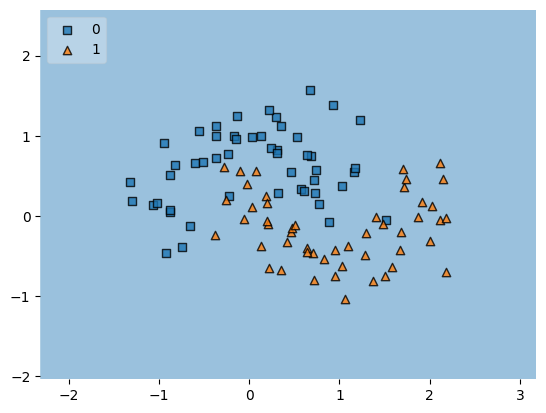

In [64]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),np.array(y.astype(int)), clf=model, legend=2)

### Weight Initilaization Techniques  
By default technique is glorot_uniform
- He Initilization   (Suitable for relu)

In [14]:
model3 = keras.Sequential()

model3.add(keras.layers.Dense(10,activation='relu',input_dim=2, kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(1,activation='sigmoid', kernel_initializer='glorot_normal'))

# model3.summary()

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x,y,epochs=100)

F:\Data Science\Deep Learning\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5773 - loss: 0.6682
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5554 - loss: 0.6637 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5745 - loss: 0.6552 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6417 - loss: 0.6461 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6569 - loss: 0.6378 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6545 - loss: 0.6235 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6852 - loss: 0.6213 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss: 0.6173 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.6031 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.6030 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.5938 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - los

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

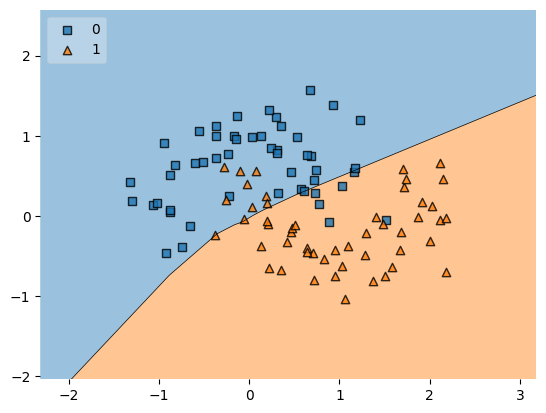

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),np.array(y.astype(int)), clf=model3, legend=2)

### Weight Initialization
- glorot_normal
- he_uniform

In [26]:
model4 = keras.Sequential()

# model4.add(keras.layers.Dense(10,activation='sigmoid',input_shape=(2,), kernel_initializer='glorot_normal'))
# model4.add(keras.layers.Dense(1,activation='sigmoid', kernel_initializer='glorot_normal'))
model4.add(keras.layers.Dense(10,activation='sigmoid',input_shape=(2,), kernel_initializer='he_uniform'))
model4.add(keras.layers.Dense(1,activation='sigmoid',kernel_initializer='glorot_normal'))


# model4.summary()

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(x,y,epochs=100)

Epoch 1/100


F:\Data Science\Deep Learning\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5510 - loss: 0.7409
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4833 - loss: 0.7582 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5281 - loss: 0.7261 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4729 - loss: 0.7363 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4906 - loss: 0.7363 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5229 - loss: 0.7112 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5448 - loss: 0.7260 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.7083 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4958 - loss: 0.7357 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4823 - loss: 0.7218 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4885 - loss: 0.7411 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5135 - loss: 0.7065 
Ep

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


<Axes: >

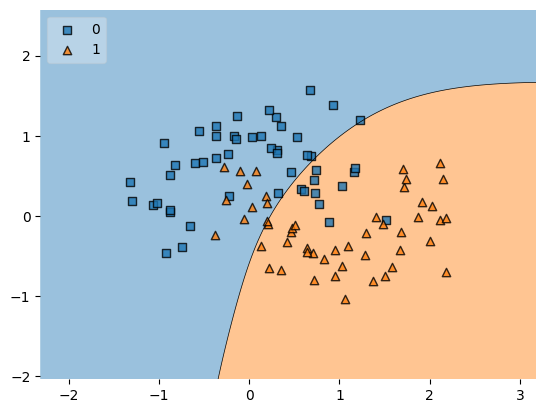

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),np.array(y.astype(int)), clf=model4, legend=2)